In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

Reading Data from CSV File

In [2]:
data = pd.read_csv('data.csv', sep=',', names=['X','Y'])
data = data.drop(0,axis=0)

for ind in data.index:
    print(ind, ' pH', data['X'][ind], ', Bicarbonate Content (in ppm)', data['Y'][ind])

1  pH 7.6 , Bicarbonate Content (in ppm) 157
2  pH 7.1 , Bicarbonate Content (in ppm) 174
3  pH 8.2 , Bicarbonate Content (in ppm) 175
4  pH 7.5 , Bicarbonate Content (in ppm) 188
5  pH 7.4 , Bicarbonate Content (in ppm) 171
6  pH 7.8 , Bicarbonate Content (in ppm) 143
7  pH 7.3 , Bicarbonate Content (in ppm) 217
8  pH 8 , Bicarbonate Content (in ppm) 190
9  pH 7.1 , Bicarbonate Content (in ppm) 142
10  pH 7.5 , Bicarbonate Content (in ppm) 190
11  pH 8.1 , Bicarbonate Content (in ppm) 215
12  pH 7 , Bicarbonate Content (in ppm) 199
13  pH 7.3 , Bicarbonate Content (in ppm) 262
14  pH 7.8 , Bicarbonate Content (in ppm) 105
15  pH 7.3 , Bicarbonate Content (in ppm) 121
16  pH 8 , Bicarbonate Content (in ppm) 81
17  pH 8.5 , Bicarbonate Content (in ppm) 82
18  pH 7.1 , Bicarbonate Content (in ppm) 210
19  pH 8.2 , Bicarbonate Content (in ppm) 202
20  pH 7.9 , Bicarbonate Content (in ppm) 155
21  pH 7.6 , Bicarbonate Content (in ppm) 157
22  pH 8.8 , Bicarbonate Content (in ppm) 147
23  p

In [3]:
# Initializing list of x data and y data

x_list = [[],[]]
y_list = []

# Iterating over the DataFrame to fill the lists with necessary information

for ind in data.index:
    x_list[0].append(1)   # x0 = 1 for all data
    x_list[1].append(float(data['X'][ind]))
    y_list.append(int(data['Y'][ind]))

# Conversion to numpy array

x_arr = np.array(x_list[1])
y_arr = np.array(y_list)

# Printing the data

print(x_arr)
print()
print(y_arr)

m = len(data)  #number of training examples
print(m)

n = len(x_list)  #number of parameters
print(n)

[7.6 7.1 8.2 7.5 7.4 7.8 7.3 8.  7.1 7.5 8.1 7.  7.3 7.8 7.3 8.  8.5 7.1
 8.2 7.9 7.6 8.8 7.2 7.9 8.1 7.7 8.4 7.4 7.3 8.5 7.8 6.7 7.1 7.3]

[157 174 175 188 171 143 217 190 142 190 215 199 262 105 121  81  82 210
 202 155 157 147 133  53  56 113  35 125  76  48 147 117 182  87]
34
2


Batch Gradient Descent

In [4]:
def cost_function(theta,x_list,y_list):
    cost=0
    for i in range(m):
        cost+=(theta[0]+theta[1]*x_list[1][i] - y_list[i])**2
    return cost/2

In [5]:
def BGD(x_data,y_data,theta,learning_rate,precision_value):
    n = len(x_data)    #number of parameters
    m = len(x_data[0])    #number of training examples
    while True:
        cost_before = cost_function(theta,x_data,y_data)
        for j in range(n):  # iterating over all parameters
            grad = 0
            for i in range(m):  # iterating over all training examples
                grad += ((theta[0]*x_data[0][i] + theta[1]*x_data[1][i] - y_data[i])*(x_data[j][i]))
            theta[j] = theta[j] - learning_rate*grad
        cost_after = cost_function(theta,x_data,y_data)

        if (abs(cost_before-cost_after)<precision_value):
            break

    return theta

Text(0.5, 1.0, 'Ground Water Survey')

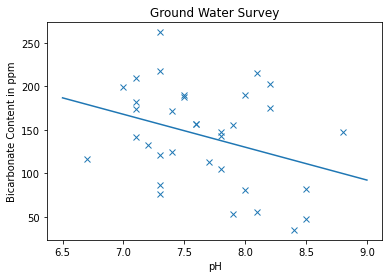

In [6]:
theta = BGD(x_list,y_list,[0,0],0.001,0.0000000001)

#plot of hypothesis function
x = np.linspace(6.5,9,1000) 
plt.plot(x, theta[0] + theta[1]*x, linestyle='solid')

#plot of training data
plt.scatter(x_arr,y_arr,marker='x',linewidths=1)
plt.xlabel("pH")
plt.ylabel("Bicarbonate Content in ppm")
plt.title("Ground Water Survey")

Stochastic Gradient Descent

In [7]:
def SGD(x_data,y_data,theta,learning_rate,precision_value):
    n = len(x_data)    #number of parameters
    m = len(x_data[0])    #number of training examples
    while True:
        for i in range(m):  # iterating over all training examples
            cost_before = cost_function(theta,x_data,y_data)

            for j in range(n):  # iterating over all parameters
                grad = ((theta[0]*x_data[0][i] + theta[1]*x_data[1][i] - y_data[i])*(x_data[j][i]))
                theta[j] = theta[j] - learning_rate*grad
            
            cost_after = cost_function(theta,x_data,y_data)

            if (abs(cost_before-cost_after)<precision_value):
                break
        
        return theta

Text(0.5, 1.0, 'Ground Water Survey')

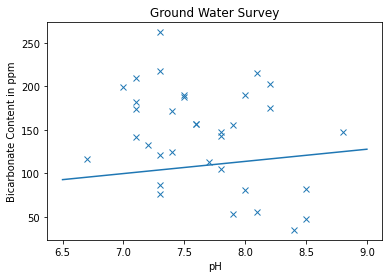

In [8]:
theta = SGD(x_list,y_list,[0,0],0.001,0.0000000001)

#plot of hypothesis function
x = np.linspace(6.5,9,1000) 
plt.plot(x, theta[0] + theta[1]*x, linestyle='solid')

#plot of training data
plt.scatter(x_arr,y_arr,marker='x',linewidths=1)
plt.xlabel("pH")
plt.ylabel("Bicarbonate Content in ppm")
plt.title("Ground Water Survey")

Normal Equation

In [9]:
def normal_equation(x_data,y_data):
    n = len(x_data)    #number of parameters
    m = len(x_data[0])    #number of training examples

    # Computing the X and Y matrices
    x_mtx = []
    y_mtx = []

    for i in range(m):
        lst = []
        for j in range(n):
            lst.append(x_data[j][i])
        x_mtx.append(lst)
        y_mtx.append([y_data[i]])

    X = np.array(x_mtx)
    Y = np.array(y_mtx)

    # Applying Normal Equation
    X_t = np.transpose(X)
    X_tY = np.matmul(X_t,Y)
    X_tX = np.matmul(X_t,X)
    iX_tX = np.linalg.inv(X_tX)
    theta = np.matmul(iX_tX, X_tY)
    
    return theta

Text(0.5, 1.0, 'Ground Water Survey')

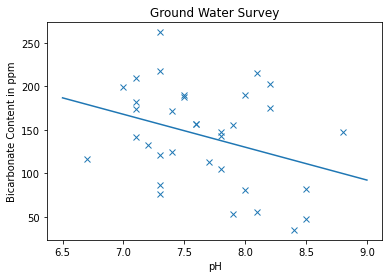

In [10]:
theta = normal_equation(x_list,y_list)

#plot of hypothesis function
x = np.linspace(6.5,9,1000) 
plt.plot(x, theta[0] + theta[1]*x, linestyle='solid')

#plot of training data
plt.scatter(x_arr,y_arr,marker='x',linewidths=1)
plt.xlabel("pH")
plt.ylabel("Bicarbonate Content in ppm")
plt.title("Ground Water Survey")